In [31]:
# 뉴턴의 방법 (Newton's Method)
    # 실수값 0점에 근사시키는 방법

# 뉴턴의 방법을 구현하기 위해서 필요한 함수 목록
  # 1) x, f(x)          (함수)
  # 2) f'(x), y', df/dx (도함수)
  # 3) x 값을 업데이트
  # 4) y 절편 값을 알아야 그림을 그릴 수 있다

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


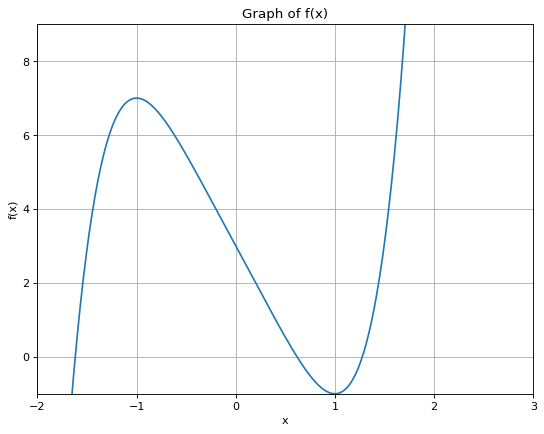

In [32]:
## 1) 함수 그래프 그리기
  # 변수란 무엇인가? - 데이터가 발생할 수 있는 범위
  # unsigned char :  1 Byte -> [0, 255]
  # f(x)의 그래프를 그린다

x = np.linspace(-3, 3, 601);
y = x**5 - 5*x + 3
figure(figsize=(8, 6), dpi=80)
plt.plot(x, y);
plt.xlabel('x');
plt.ylabel('f(x)')
plt.title('Graph of f(x)')
plt.grid('on');
plt.axis([-2, 3, -1, 9]);


In [39]:
## 2) 함수 정의부
  # 각 함수의 명칭에 맞게 함수를 표현하라.

def f(x):
  return x**5 - 5*x +3

def fp(x):
  return 5*x -5  # 도함수

def y_int(x):
  return x # 수정할 코드

def updateX(x):
  return x # 수정할 코드


1.0


/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_23030/4024851503.py:15: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerlines,_ ,_ = plt.stem(x0, y0, markerfmt='*r', linefmt='--k',


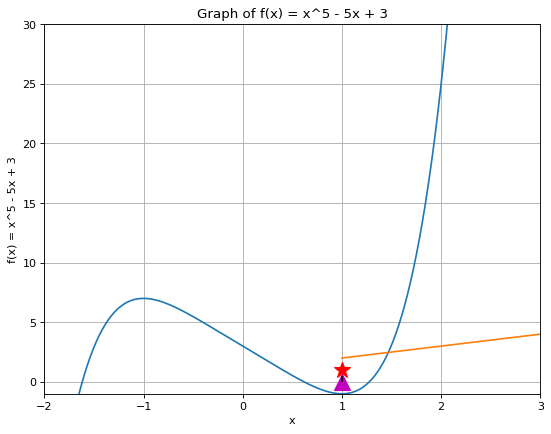

In [34]:
## 3) 초기값 설정하기

figure(figsize=(8, 6), dpi=80)
plt.plot(x, y);
plt.xlabel('x');
plt.ylabel('f(x) = x^5 - 5x + 3')
plt.title('Graph of f(x) = x^5 - 5x + 3')
plt.grid('on');
plt.axis([-2, 3, -1, 30]);

x0 = 1.0 # 수정할 코드
y0 = f(x0)

plt.plot(x0, 0, '^m', markersize=15)
markerlines,_ ,_ = plt.stem(x0, y0, markerfmt='*r', linefmt='--k',
                            use_line_collection=True)
markerlines.set_markersize(15)

# tangent line
t_x = np.linspace(1, 3, 2)
t_y = fp(x0) * t_x + y_int(x0)
plt.plot(t_x, t_y)

x1 = updateX(x0)
print(x1)

/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_23030/1484929484.py:34: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerlines, _, _ = plt.stem([x], [y],


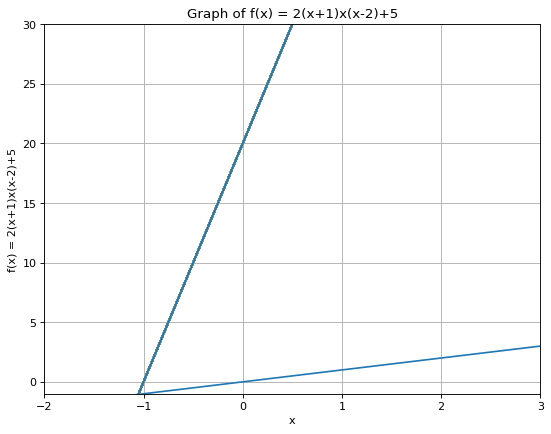

x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20.0
x: 20.0, y: 20

In [35]:
## 4) 경사로를 따라 내려오기

# 그래프 설정
def setup_graph():
    x = np.linspace(-2, 3, 400)
    y = f(x)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x) = 2(x+1)x(x-2)+5')
    plt.title('Graph of f(x) = 2(x+1)x(x-2)+5')
    plt.grid('on')
    plt.axis([-2, 3, -1, 30])

# 초기화 및 설정
x = 20.0  # 초기 추측값 변경
x_history = [x]
y_history = [f(x)]

# 그래프 설정
setup_graph()

# 반복 과정 수정
n_iterations = 100  # 반복 횟수
for i in range(n_iterations):  # 수정할 코드
    y = f(x)

    # 현재 x 위치와 y 값을 히스토리에 저장
    x_history.append(x)
    y_history.append(y)

    # 현재 x 위치 표시
    plt.plot(x, 0, '^m', markersize=15)
    markerlines, _, _ = plt.stem([x], [y],
                                 markerfmt='*r',
                                 linefmt='--k',
                                 use_line_collection=True)
    markerlines.set_markersize(15)

    # 접선 그리기
    t_x = np.linspace(-3, 3, 2)
    t_y = fp(x) * t_x + y_int(x)
    plt.plot(t_x, t_y)

    # x 값 업데이트
    x = updateX(x)

# 반복문 종료 후 히스토리 출력
plt.show()
for x_val, y_val in zip(x_history, y_history):
    print(f"x: {x_val}, y: {y_val}")

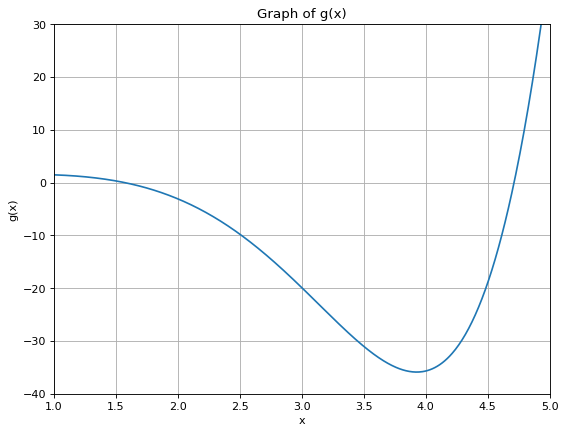

In [36]:
## 5) 함수 정의부
  # 다른 함수를 정의해보자.

def g(x):
    return np.cos(x) * np.exp(x)

def gp(x):
  return x # 수정할 코드

def y_int(x):
  return x # 수정할 코드

def updateX(x, alpha ):  # 수정할 코드
  return x # 수정할 코드

x = np.linspace(1, 5, 601);
y = g(x)

figure(figsize=(8, 6), dpi=80)
plt.plot(x, y);
plt.xlabel('x');
plt.ylabel('g(x)')
plt.title('Graph of g(x)')
plt.grid('on');
plt.axis([1, 5, -40, 30]);

/var/folders/87/hlhccs711c7_9_swp9th8n_m0000gn/T/ipykernel_23030/926134774.py:33: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerlines, _, _ = plt.stem([x], [y],


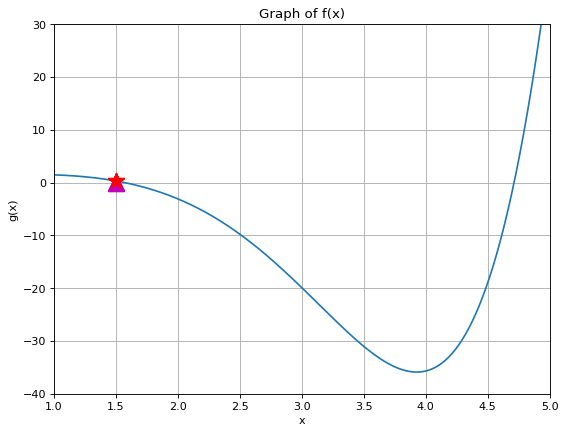

x: 1.5, y: 0.3170221435804436
x: 1.5, y: 0.3170221435804436
x: 1.5, y: 0.3170221435804436
x: 1.5, y: 0.3170221435804436
x: 1.5, y: 0.3170221435804436
x: 1.5, y: 0.3170221435804436
x: 1.5, y: 0.3170221435804436


In [37]:
## 6) 경사로를 따라 내려오기
# 그래프 설정
def setup_graph():
    x = np.linspace(1, 5, 601);
    y = g(x)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('g(x)')
    plt.title('Graph of f(x)')
    plt.grid('on')
    plt.axis([1, 5, -40, 30]);

# 초기화 및 설정
x = 1.5  # 초기 추측값 변경
x_history = [x]
y_history = [g(x)]

# 그래프 설정
setup_graph()

# 반복 과정 수정
n_iterations = 6  # 반복 횟수
for i in range(n_iterations):  # 수정할 코드
    y = g(x)

    # 현재 x 위치와 y 값을 히스토리에 저장
    x_history.append(x)
    y_history.append(y)

    # 현재 x 위치 표시
    plt.plot(x, 0, '^m', markersize=15)
    markerlines, _, _ = plt.stem([x], [y],
                                 markerfmt='*r',
                                 linefmt='--k',
                                 use_line_collection=True)
    markerlines.set_markersize(15)

    # x 값 업데이트
    x = updateX(x, 0.04)

# 반복문 종료 후 히스토리 출력
plt.show()
for x_val, y_val in zip(x_history, y_history):
    print(f"x: {x_val}, y: {y_val}")

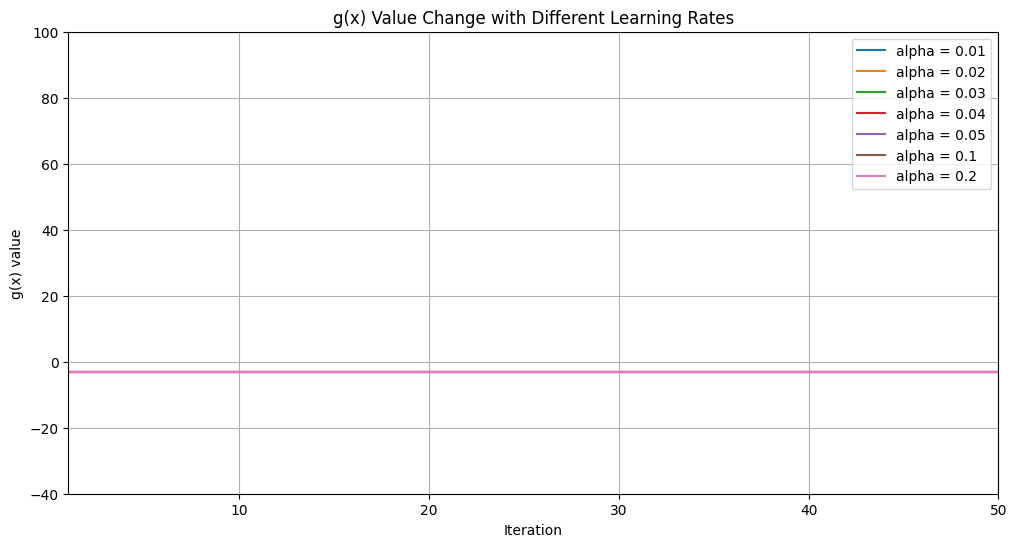

In [38]:
## 7) 학습률에 따른 경사의 변화 관찰하기
  # 수정할 코드 없음

# 학습률(alpha)에 따른 y 값의 변화 추이를 시각화하는 함수
def plot_learning_rates(alphas, n_iterations=20):
    x_initial = 2  # 초기 추측값

    for alpha in alphas:
        x = x_initial
        y_history = [g(x)]

        for _ in range(n_iterations):
            x = updateX(x, alpha)
            y_history.append(g(x))

        plt.plot(y_history, label=f'alpha = {alpha}')

# 다양한 학습률에 대한 시각화
n_iterations = 50
alphas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2]
plt.figure(figsize=(12, 6))
plot_learning_rates(alphas, n_iterations)

plt.xlabel('Iteration')
plt.ylabel('g(x) value')
plt.title('g(x) Value Change with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.axis([1, n_iterations, -40, 100]);
plt.show()
